In [366]:
# coding=utf8

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [367]:
# 1. 获取数据
# 2. 基本数据处理
# 2.1 缺失值处理
# 2.2 确定特征值，目标值
# 2.3 分割数据
# 3. 特征工程（标准化）
# 4. 机器学习（逻辑回归）
# 5. 模型评估

In [368]:
# 1. 获取数据
df = pd.read_csv('data/交易明细.csv',
                 sep=',',
                 # index_col=['时间'],  # 设置行索引
                 parse_dates=['时间'],  # 解析时间 2017/8/16 18:10
                 date_parser=lambda x: pd.to_datetime(x, format='%Y/%m/%d %H:%M'),  # 时间解析的格式
                 usecols=['时间','方向','开仓均价','平仓价格','类别'],
                 encoding='gbk',
                 )
pd.set_option('precision', 2)  # 显示小数点后的位数
np.set_printoptions(precision=3, suppress=True)  #设定numpy显示浮点数精度的小数位数,不使用科学记数法

print(df.dtypes)
df.head()

时间      datetime64[ns]
方向               int64
开仓均价             int64
平仓价格             int64
类别               int64
dtype: object


,时间,方向,开仓均价,平仓价格,类别
0,2017-08-16 18:10:00,-1,1723,1726,0
1,2017-08-18 13:30:00,1,1726,1732,1
2,2017-08-18 13:50:00,-1,1732,1735,0
3,2017-08-18 14:00:00,1,1735,1732,0
4,2017-08-21 13:25:00,-1,1732,1734,0


In [369]:
# 2. 基本数据处理
# 2.1 缺失值处理
# 2.2 确定特征值，目标值

In [370]:
# x = df.iloc[:, 1: -1]
x = df.loc[:, ['开仓均价','平仓价格']]
x.head()

,开仓均价,平仓价格
0,1723,1726
1,1726,1732
2,1732,1735
3,1735,1732
4,1732,1734


In [371]:
y = df["方向"]
print(y.head())

yy= df.replace({'类别':{0: -1}})
print(yy.head(20))

yy= df['方向']*yy['类别']
print(yy.head(20))


0   -1
1    1
2   -1
3    1
4   -1
Name: 方向, dtype: int64
                    时间  方向  开仓均价  平仓价格  类别
0  2017-08-16 18:10:00  -1  1723  1726  -1
1  2017-08-18 13:30:00   1  1726  1732   1
2  2017-08-18 13:50:00  -1  1732  1735  -1
3  2017-08-18 14:00:00   1  1735  1732  -1
4  2017-08-21 13:25:00  -1  1732  1734  -1
5  2017-08-21 17:50:00   1  1734  1728  -1
6  2017-08-22 17:35:00  -1  1728  1730  -1
7  2017-08-23 18:30:00   1  1730  1731   1
8  2017-08-29 13:15:00  -1  1731  1722   1
9  2017-08-29 14:00:00   1  1722  1718  -1
10 2017-09-01 13:25:00  -1  1718  1690   1
11 2017-09-01 13:40:00   1  1690  1692   1
12 2017-09-01 14:15:00  -1  1692  1694  -1
13 2017-09-01 15:05:00   1  1694  1691  -1
14 2017-09-01 18:20:00  -1  1691  1694  -1
15 2017-09-01 18:55:00   1  1694  1691  -1
16 2017-09-04 13:10:00  -1  1691  1698  -1
17 2017-09-05 14:55:00   1  1698  1709   1
18 2017-09-05 17:45:00  -1  1709  1713  -1
19 2017-09-06 19:00:00   1  1713  1715   1
0     1
1     1
2     1
3    -1
4     1

In [372]:
# 2.3 分割数据
x_train, x_test, y_train, y_test, yy_train, yy_test = train_test_split(x, y.ravel(), yy.ravel(), random_state=2,  test_size=0.2)

In [373]:
# 3. 特征工程（标准化）
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

In [374]:
print(type(y), type(yy))
print(type(x_train), type(x_test))
print(type(y_train), type(y_test))
print(type(yy_train), type(yy_test))
print(yy_train.shape, yy_test.shape)

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(400,) (100,)


In [375]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(400, 2) (100, 2) (400,) (100,)


In [376]:
# 4. 机器学习（逻辑回归）
estimator = LogisticRegression()
estimator.fit(x_train, y_train)

LogisticRegression()

In [377]:
# 5. 模型评估
y_pre = estimator.predict(x_test)
print("预测值：\n", y_pre)
print(type(y_pre))
score = estimator.score(x_test, yy_test)
print("准确率是：\n", score)

预测值：
 [-1 -1  1  1  1  1 -1  1 -1 -1  1 -1  1  1  1  1 -1  1 -1  1  1 -1 -1  1
 -1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1  1
  1  1  1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1
 -1 -1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1
 -1  1  1  1]
<class 'numpy.ndarray'>
准确率是：
 0.6


In [378]:
left = df[['方向','类别']].iloc[-10:]
right = pd.DataFrame(y_pre[-10:])
df[['方向','类别']].iloc[-10:]

,方向,类别
490,-1,0
491,1,0
492,-1,0
493,1,0
494,-1,0
495,1,1
496,-1,0
497,1,0
498,-1,0
499,1,0


In [379]:
print(y_pre[-10:])
print(y_test[-10:])
print(yy_test[-10:])
# print(yy_test[yy_test == 1])

[-1 -1  1 -1 -1  1 -1  1  1  1]
[-1  1  1  1 -1  1  1 -1  1 -1]
[ 1 -1 -1 -1  1  1 -1 -1 -1  1]


In [437]:
# 拟合分类模型
rbf = SVC(kernel='rbf', C=1.0, gamma=1, probability=True)
linear = SVC(kernel='linear', C=1.0, gamma='auto', probability=True)
poly = SVC(kernel='poly', C=1.0, gamma='auto', degree=3, coef0=1, probability=True)

In [438]:
svcs = [rbf, linear, poly]
kernel_label = ["rbf", "linear", "poly"]
for ix, svc in enumerate(svcs):
    performance = svc.fit(x_train, y_train.ravel())
    # 获取预测值
    y_test_pred = performance.predict(x_test)
    # 显示估计器
    print(f'ix=%s, svcs=%s' %(ix, svcs[ix]))
    # 获取这个估计器的参数
    print(f'估计器的参数: %s' %(svc.get_params()))
    # https://blog.csdn.net/gracejpw/article/details/101546293
    # 返回预测的决定系数R^2
    # R^2越接近于1，模型的拟合优度越高。
    print(f'训练集R2评分: %.2f ' % (performance.score(x_train, y_train)))
    print(f'测试集R2评分: %.2f ' %(svc.score(x_test, yy_test)))

ix=0, svcs=SVC(gamma=1, probability=True)
估计器的参数: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
训练集R2评分: 0.52 
测试集R2评分: 0.51 
ix=1, svcs=SVC(gamma='auto', kernel='linear', probability=True)
估计器的参数: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
训练集R2评分: 0.50 
测试集R2评分: 0.57 
ix=2, svcs=SVC(coef0=1, gamma='auto', kernel='poly', probability=True)
估计器的参数: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 1, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': -1, 'p

目标类别统计 (array([-1,  1], dtype=int64), array([46, 54], dtype=int64))
预测类别统计 (array([-1,  1], dtype=int64), array([95,  5], dtype=int64))
预测相同 [ 5 20 15  9  2  2  9 15 20  5] [0.373 0.398 0.424 0.449 0.475 0.5   0.525 0.551 0.576 0.602 0.627]
预测不同 [ 1 28 11  8  1  1  8 11 28  1] [0.379 0.403 0.427 0.452 0.476 0.5   0.524 0.548 0.573 0.597 0.621]
[0.373 0.398 0.424 0.449 0.475 0.525 0.551 0.576 0.602 0.627]
[0.379 0.403 0.427 0.452 0.476 0.524 0.548 0.573 0.597 0.621]


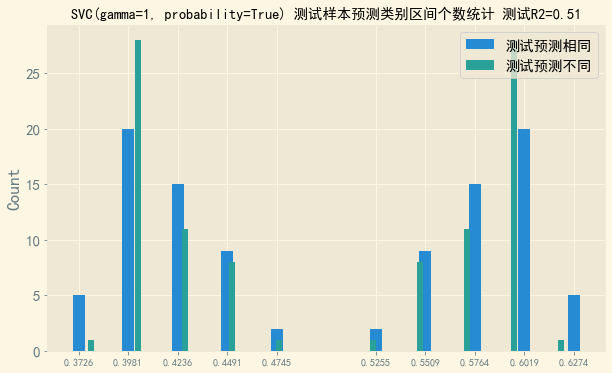

In [457]:
# 绘制训练样本类别预测与目标分类的相同和不同的概率区别统计图
plt.style.use(plt.style.available[0])  #可以通过下标进行选择适合自己的画图样式
plt.rcParams['font.sans-serif'] = ['SimHei']  #指定默认字体,用来正常显示中文标签
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号


clf = rbf
# clf = linear
# clf = estimator
score_test = clf.score(x_test, yy_test)
# print(clf.kernel)
print('目标类别统计',np.unique(yy_test,axis=0,return_counts=True))  #统计等每个分类的个数

x_test_pred = clf.predict(x_test)[:]  #测试样本预测
print('预测类别统计',np.unique(x_test_pred,axis=0, return_counts=True))  #统计预测的每个分类个数


id_test_no = (x_test_pred != yy_test)  #测试样本预测类别与测试目标类别不同的下标
id_test_ok = (x_test_pred == yy_test)  #测试样本预测类别与测试目标类别不同的下标
test_no = clf.predict_proba(x_test)[id_test_no]  #测试样本预测类别与测试目标类别不同的概率值
test_ok = clf.predict_proba(x_test)[id_test_ok]


# 绘制测试样本类别预测与目标分类的相同和不同的概率区别统计图
his_test_ok, his_ok = np.histogram(test_ok, bins=10)
print('预测相同',his_test_ok, his_ok)
his_test_no, his_no = np.histogram(test_no, bins=10)
print('预测不同',his_test_no, his_no)
# 绘制图像
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 6)
plt.set_cmap('RdBu')
# plt.set_cmap('jet')

his_ok = np.delete(his_ok, [5])
his_no = np.delete(his_no, [5])
print(his_ok)
print(his_no)
w = his_no[-1]/100
# 绘制多个bar在同一个图中, 这里需要控制width
plt.bar(his_ok, height=his_test_ok, width=1 * w, align='center')  #测试样本预测相同
plt.bar(his_no, height=his_test_no, width=0.5 * w, align='center')  #测试样本预测不同
# 设置坐标轴的标签
ax1.yaxis.set_tick_params(labelsize=15)  # 设置y轴的字体的大小
ax1.set_xticks(his_ok)  # 设置xticks出现的位置
# 设置坐标轴名称
ax1.set_ylabel("Count", fontsize='xx-large')
# 设置标题
ax1.set_title('%s 测试样本预测类别区间个数统计 测试R2=%.2f' % (clf, score_test), fontsize='x-large')
# 设置图例
plt.legend(('测试预测相同', '测试预测不同'), fontsize='x-large', loc='upper right')
plt.show()

In [383]:
print(x_test_pred[:20])
print(yy_test[:20])
print(type(x_test_pred), x_test_pred.shape)
print(type(yy_test), yy_test.shape)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1  1  1  1  1  1  1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1  1]
<class 'numpy.ndarray'> (100,)
<class 'numpy.ndarray'> (100,)


In [384]:
print('测试样本预测类别与测试目标类别相同的有%s 由predict_proba计算的概率值,显示前10行\n%s'
      % (test_ok.shape, clf.predict_proba(x_test)[id_test_ok][:10]))

print('测试样本预测类别与测试目标类别不同有%s 由predict_proba计算的概率值,显示前10行\n%s'
      % (test_no.shape, clf.predict_proba(x_test)[id_test_no][:10]))

测试样本预测类别与测试目标类别相同的有(51, 2) 由predict_proba计算的概率值,显示前10行
[[0.38  0.62 ]
 [0.373 0.627]
 [0.416 0.584]
 [0.597 0.403]
 [0.411 0.589]
 [0.366 0.634]
 [0.361 0.639]
 [0.397 0.603]
 [0.444 0.556]
 [0.374 0.626]]
测试样本预测类别与测试目标类别不同有(49, 2) 由predict_proba计算的概率值,显示前10行
[[0.376 0.624]
 [0.372 0.628]
 [0.381 0.619]
 [0.373 0.627]
 [0.378 0.622]
 [0.363 0.637]
 [0.424 0.576]
 [0.329 0.671]
 [0.383 0.617]
 [0.393 0.607]]
